In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd gdrive/MyDrive/cs334/data/

/content/gdrive/MyDrive/cs334/data


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
!ls /content/gdrive/MyDrive/cs334/

'cs334 project proposal.gdoc'   drop_and_one_hot_encoded.ipynb
 data			        numericals.csv


In [3]:
df5 = pd.read_csv('/content/gdrive/MyDrive/cs334/data/may.csv')
df6 = pd.read_csv('/content/gdrive/MyDrive/cs334/data/june.csv')
df7 = pd.read_csv('/content/gdrive/MyDrive/cs334/data/july.csv')
df_full = pd.concat([df5, df6, df7], ignore_index=True).drop(columns='Unnamed: 27')

In [6]:
df_full = pd.concat([df5, df6, df7], ignore_index=True).drop(columns='Unnamed: 27')

In [ ]:
df_full.shape

(1599345, 27)

In [7]:
df_full = df_full.dropna(axis=0, how='any')

In [8]:
# NEW: convert the hhmm format of time to actual minutes since 12am
df_full['CRS_DEP_TIME'] = df_full['CRS_DEP_TIME'].map(lambda x: x//100*60+x%100)
df_full['CRS_ARR_TIME'] = df_full['CRS_ARR_TIME'].map(lambda x: x//100*60+x%100)

In [4]:
# NEW: convert the hhmm format of time to actual minutes since 12am
df_full['CRS_DEP_TIME'] = df_full['CRS_DEP_TIME'].map(lambda x: x//100*60+x%100)
df_full['CRS_ARR_TIME'] = df_full['CRS_ARR_TIME'].map(lambda x: x//100*60+x%100)
df_full['DAY_OF_MONTH'] = df_full['DAY_OF_MONTH'].map(lambda x: str(x))
df_full['DAY_OF_WEEK'] = df_full['DAY_OF_WEEK'].map(lambda x: str(x))

In [ ]:
dfY = df_full[['DEP_DELAY', 'DEP_DEL15', 'ARR_DELAY', 'ARR_DEL15', 'CANCELLED']]

In [ ]:
 dfX = df_full.drop(columns=['ORIGIN_CITY_NAME', 'MONTH', 'QUARTER', 'DEST_CITY_NAME', 'YEAR', 'FLIGHTS', 'FL_DATE', 'DEP_TIME', 'DEP_DELAY', 'DEP_DEL15', 'ARR_TIME', 'ARR_DELAY', 'ARR_DEL15', 'CANCELLED', 'DIVERTED', 'ACTUAL_ELAPSED_TIME', 'CRS_ARR_TIME', 'CRS_ELAPSED_TIME'])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_full['DEP_DEL15'].value_counts()

0.0    1258095
1.0     341250
Name: DEP_DEL15, dtype: int64

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(dfX, dfY, test_size=0.33, random_state=42)

In [ ]:
xTrain.head()

In [ ]:
!pip install category_encoders

     |████████████████████████████████| 82 kB 369 kB/s 


In [ ]:
import category_encoders as ce

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# count encoding
ecd = ce.CountEncoder()
data = ecd.fit_transform(xTrain)
data.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,ORIGIN_STATE_ABR,DEST,DEST_STATE_ABR,CRS_DEP_TIME,DISTANCE
780572,35393,159138,33443,31081,37326,25237,29353,764,867.0
635168,34839,142857,133648,11568,101143,15659,24236,1037,920.0
1424832,33559,159138,189831,3389,10368,6488,100895,835,835.0
769243,35783,155277,133648,36698,50388,3563,3619,440,644.0
1483855,35209,146538,189831,3466,20443,55493,60531,810,332.0


In [ ]:
xTrain['OP_UNIQUE_CARRIER_COUNT'] = data['OP_UNIQUE_CARRIER']
xTrain['ORIGIN_COUNT'] = data['ORIGIN']
xTrain['ORIGIN_STATE_ABR_COUNT'] = data['ORIGIN_STATE_ABR']
xTrain['DEST_COUNT'] = data['DEST']
xTrain['DEST_STATE_ABR_COUNT'] = data['DEST_STATE_ABR']
xTrain['DAY_OF_MONTH_COUNT'] = data['DAY_OF_MONTH']
xTrain['DAY_OF_WEEK_COUNT'] = data['DAY_OF_WEEK']

In [ ]:
data = ecd.transform(xTest)
xTest['OP_UNIQUE_CARRIER_COUNT'] = data['OP_UNIQUE_CARRIER']
xTest['ORIGIN_COUNT'] = data['ORIGIN']
xTest['ORIGIN_STATE_ABR_COUNT'] = data['ORIGIN_STATE_ABR']
xTest['DEST_COUNT'] = data['DEST']
xTest['DEST_STATE_ABR_COUNT'] = data['DEST_STATE_ABR']
xTest['DAY_OF_MONTH_COUNT'] = data['DAY_OF_MONTH']
xTest['DAY_OF_WEEK_COUNT'] = data['DAY_OF_WEEK']

In [ ]:
# next step is using m-estimator encoding, but that depends on
# which target variable to predict, say DEP_DELAY

# m estimate encoding
# ecd = ce.m_estimate.MEstimateEncoder(m=1.0) 
# now assume m = 1, may need to tune with other parameters (w/sklearn pipeline?)
# ecd.fit(xTrain, yTrain['DEP_DELAY'])
# xTrain = ecd.transform(xTrain)
# xTest = ecd.transform(xTest)
# no need to do operation like the code cell above because this transform
# will automatically replace the cat var with the new var

In [ ]:
# next step in the pipeline is standard scaling
# so for now, just save the current four files
# TODO: perhaps rerun some of the figures below, please?

In [ ]:
xTrain.to_csv("xTrain.csv", index=False)
yTrain.to_csv("yTrain.csv", index=False)
xTest.to_csv("xTest.csv", index=False)
yTest.to_csv("yTest.csv", index=False)

NameError: ignored

In [ ]:
yTrain.shape

(1071561, 5)

In [5]:
df_full['DAY_OF_MONTH'] = df_full['DAY_OF_MONTH'].map(lambda x: str(x))
df_full['DAY_OF_WEEK'] = df_full['DAY_OF_WEEK'].map(lambda x: str(x))

In [ ]:
df_full['DAY_OF_WEEK']

0          6
1          7
2          1
3          4
4          5
          ..
1624921    1
1624922    1
1624923    1
1624924    1
1624925    1
Name: DAY_OF_WEEK, Length: 1624926, dtype: object

In [ ]:
xTrain.head()

In [ ]:
xTest.head()

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,ORIGIN_STATE_ABR,DEST,DEST_STATE_ABR,CRS_DEP_TIME,CRS_ARR_TIME,CRS_ELAPSED_TIME,DISTANCE,CARRIER_COUNT,ORIGIN_COUNT,ORIGIN_STATE_ABR_COUNT,DEST_COUNT,DEST_STATE_ABR_COUNT
1378354,3,7,29,4,UA,EWR,NJ,ORD,IL,795,885,150.0,719.0,73891,14830,15786,45180,60103
1308693,3,7,16,5,HA,LIH,HI,HNL,HI,360,395,35.0,102.0,11190,2142,19661,8784,19632
332664,2,5,14,5,YV,IAH,TX,OMA,NE,1010,1143,133.0,781.0,28761,22975,120943,3743,4483
1617872,3,7,2,5,OO,JAC,WY,SLC,UT,935,996,61.0,205.0,134078,1423,2636,21960,23244
1291909,3,7,30,5,F9,DTW,MI,MIA,FL,616,799,183.0,1145.0,25224,23046,29663,16307,103199


In [ ]:
# initial attempt with one hot encoding
# prefixs = ['CARRIER', 'ORIGIN_AIRPORT', 'ORIGIN_CITY', 'ORIGIN_STATE', 'DEST_AIRPORT', 'DEST_CITY', 'DEST_STATE']
df = df.drop(columns=['ORIGIN_CITY_NAME', 'DEST_CITY_NAME'])
prefixs = ['CARRIER', 'ORIGIN_AIRPORT', 'ORIGIN_STATE', 'DEST_AIRPORT', 'DEST_STATE']

In [ ]:
df = df.drop(columns=['FLIGHTS'])

In [ ]:
# Since variables like carrier, origin, and destination are categorical variables, we make convert them into dummies. 
df_num = pd.get_dummies(df, prefix=prefixs)

In [ ]:
df_num.to_csv("numericals.csv", index=False)

In [ ]:
df_num.head()
# found too many features, that which may cause problem. now considering other methods

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,CRS_ARR_TIME,CRS_ELAPSED_TIME,DISTANCE,CARRIER_9E,CARRIER_AA,CARRIER_AS,CARRIER_B6,CARRIER_DL,CARRIER_F9,CARRIER_G4,CARRIER_HA,CARRIER_MQ,CARRIER_NK,CARRIER_OH,CARRIER_OO,CARRIER_QX,CARRIER_UA,CARRIER_WN,CARRIER_YV,CARRIER_YX,ORIGIN_AIRPORT_ABE,ORIGIN_AIRPORT_ABI,ORIGIN_AIRPORT_ABQ,ORIGIN_AIRPORT_ABR,ORIGIN_AIRPORT_ABY,ORIGIN_AIRPORT_ACK,ORIGIN_AIRPORT_ACT,ORIGIN_AIRPORT_ACV,ORIGIN_AIRPORT_ACY,ORIGIN_AIRPORT_ADK,ORIGIN_AIRPORT_ADQ,ORIGIN_AIRPORT_AEX,ORIGIN_AIRPORT_AGS,ORIGIN_AIRPORT_AKN,ORIGIN_AIRPORT_ALB,...,DEST_STATE_IL,DEST_STATE_IN,DEST_STATE_KS,DEST_STATE_KY,DEST_STATE_LA,DEST_STATE_MA,DEST_STATE_MD,DEST_STATE_ME,DEST_STATE_MI,DEST_STATE_MN,DEST_STATE_MO,DEST_STATE_MS,DEST_STATE_MT,DEST_STATE_NC,DEST_STATE_ND,DEST_STATE_NE,DEST_STATE_NH,DEST_STATE_NJ,DEST_STATE_NM,DEST_STATE_NV,DEST_STATE_NY,DEST_STATE_OH,DEST_STATE_OK,DEST_STATE_OR,DEST_STATE_PA,DEST_STATE_PR,DEST_STATE_RI,DEST_STATE_SC,DEST_STATE_SD,DEST_STATE_TN,DEST_STATE_TT,DEST_STATE_TX,DEST_STATE_UT,DEST_STATE_VA,DEST_STATE_VI,DEST_STATE_VT,DEST_STATE_WA,DEST_STATE_WI,DEST_STATE_WV,DEST_STATE_WY
0,2,5,29,6,2035,2256,141.0,761.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2,5,30,7,2035,2256,141.0,761.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2,5,31,1,2035,2256,141.0,761.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,2,5,6,4,1616,1802,166.0,861.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,2,5,7,5,1616,1802,166.0,861.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
# attempt with pca?
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
ecd = OneHotEncoder().fit_transform(np.array(df_full['DEST_CITY_NAME']).reshape(-1,1))
num_cities = ecd.toarray()
pca = PCA(n_components=0.95).fit(num_cities)
# ram ran out issue (suspect not working anyway)

In [ ]:
# attempt with binary encoding

ecd = ce.BinaryEncoder()
data = ecd.fit_transform(df_full['DEST_CITY_NAME'])
data.head()
# seems feasible with 9 cols? (but interpretability reduced?)
# also weird implication that some cities is similar to some cities 
# (when sharing a same digit) maybe not use

,DEST_CITY_NAME_0,DEST_CITY_NAME_1,DEST_CITY_NAME_2,DEST_CITY_NAME_3,DEST_CITY_NAME_4,DEST_CITY_NAME_5,DEST_CITY_NAME_6,DEST_CITY_NAME_7,DEST_CITY_NAME_8
0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0


In [ ]:
# attempt with count encoder
ecd2 = ce.CountEncoder(normalize=True)
data2 = ecd2.fit_transform(df_full['DEST_CITY_NAME'])
data2.head()
# probably worthy but not sufficient. likely need normalization
# category imbalance noticed

,DEST_CITY_NAME
0,0.000909
1,0.000909
2,0.000909
3,0.047155
4,0.047155


In [ ]:
# attempt with target encoder / m estimate
ecd3 = ce.m_estimate.MEstimateEncoder(m=1.0)
ecd3.fit(df_full['DEST_CITY_NAME'], df_full['DEP_DELAY'])
data3 = ecd3.transform(df_full['DEST_CITY_NAME'])
data3.head()
# issue with data (mainly target) leakage
# => regularization is needed , one paremeter for m estimate 
# => careful cross validation 
# => tuning will be painful (or just set to m=1)

,DEST_CITY_NAME
0,12.144771
1,12.144771
2,12.144771
3,19.675100
4,19.675100


In [ ]:
# attempt with glmm encoder
ecd4 = ce.glmm.GLMMEncoder()
ecd4.fit(df_full['DEST_CITY_NAME'], df_full['DEP_DELAY'])
data4 = ecd4.transform(df_full['DEST_CITY_NAME'])
data4.head()
# run failure

In [ ]:
%ls

july.csv  june.csv  may.csv  numericals.csv


In [ ]:
df.isnull().sum()
# No attribute has any null value. 

QUARTER              0
MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
ORIGIN               0
ORIGIN_STATE_ABR     0
DEST                 0
DEST_STATE_ABR       0
CRS_DEP_TIME         0
CRS_ARR_TIME         0
CRS_ELAPSED_TIME     0
DISTANCE             0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
dep_delay = df_full['DEP_DELAY']
dep_delay.head()

0    15.0
1    -5.0
2   -10.0
3    -4.0
4    10.0
Name: DEP_DELAY, dtype: float64

In [ ]:
df_dep_delay = df
df_dep_delay['target(dep_delay)'] = dep_delay
df_dep_delay.head()

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,ORIGIN_STATE_ABR,DEST,DEST_STATE_ABR,CRS_DEP_TIME,CRS_ARR_TIME,CRS_ELAPSED_TIME,DISTANCE,target(dep_delay)
0,2,5,29,6,OH,CLT,NC,BTV,VT,2035,2256,141.0,761.0,15.0
1,2,5,30,7,OH,CLT,NC,BTV,VT,2035,2256,141.0,761.0,-5.0
2,2,5,31,1,OH,CLT,NC,BTV,VT,2035,2256,141.0,761.0,-10.0
3,2,5,6,4,OH,DAY,OH,DFW,TX,1616,1802,166.0,861.0,-4.0
4,2,5,7,5,OH,DAY,OH,DFW,TX,1616,1802,166.0,861.0,10.0


In [9]:
df_full.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST,DEST_CITY_NAME,DEST_STATE_ABR,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,FLIGHTS,DISTANCE
0,2021,2,5,29,6,2021-05-29,OH,CLT,"Charlotte, NC",NC,BTV,"Burlington, VT",VT,1235,2050.0,15.0,1.0,1376,2255.0,-1.0,0.0,0.0,0.0,141.0,125.0,1.0,761.0
1,2021,2,5,30,7,2021-05-30,OH,CLT,"Charlotte, NC",NC,BTV,"Burlington, VT",VT,1235,2030.0,-5.0,0.0,1376,2236.0,-20.0,0.0,0.0,0.0,141.0,126.0,1.0,761.0
2,2021,2,5,31,1,2021-05-31,OH,CLT,"Charlotte, NC",NC,BTV,"Burlington, VT",VT,1235,2025.0,-10.0,0.0,1376,2252.0,-4.0,0.0,0.0,0.0,141.0,147.0,1.0,761.0
3,2021,2,5,6,4,2021-05-06,OH,DAY,"Dayton, OH",OH,DFW,"Dallas/Fort Worth, TX",TX,976,1612.0,-4.0,0.0,1082,1808.0,6.0,0.0,0.0,0.0,166.0,176.0,1.0,861.0
4,2021,2,5,7,5,2021-05-07,OH,DAY,"Dayton, OH",OH,DFW,"Dallas/Fort Worth, TX",TX,976,1626.0,10.0,0.0,1082,1805.0,3.0,0.0,0.0,0.0,166.0,159.0,1.0,861.0


In [17]:
df_15 = df_full[['DAY_OF_MONTH','DAY_OF_WEEK','CRS_DEP_TIME','CRS_ARR_TIME','CRS_ELAPSED_TIME','DISTANCE','DEP_DEL15']]
df_con = df_full[['DAY_OF_MONTH','DAY_OF_WEEK','CRS_DEP_TIME','CRS_ARR_TIME','CRS_ELAPSED_TIME','DISTANCE','DEP_DELAY']]

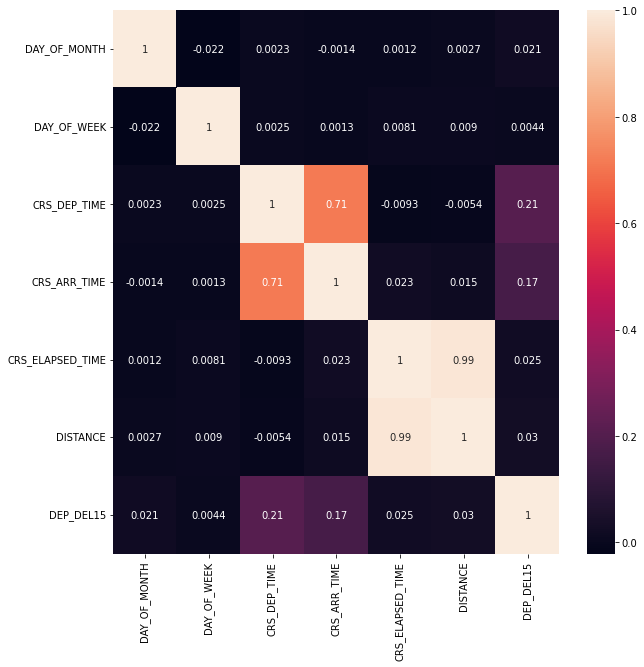

In [16]:
corrMatrix = df_15.corr()
plt.figure(figsize=(10,10))
sn.heatmap(corrMatrix, annot=True)
plt.show()

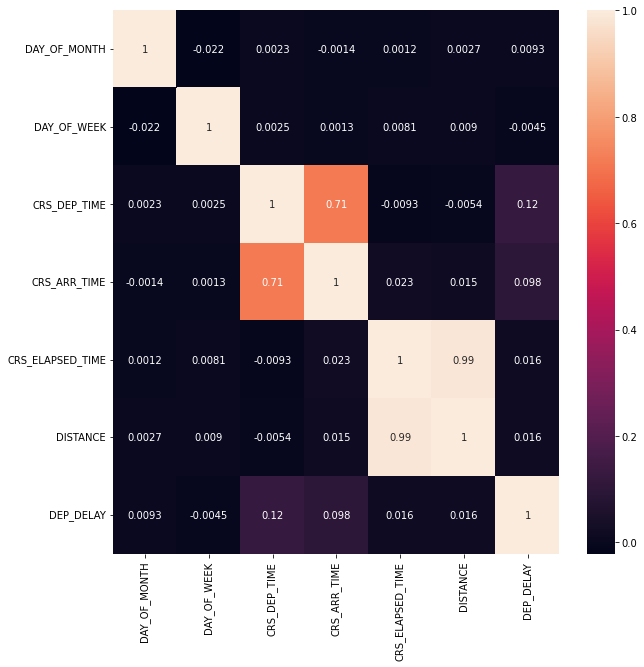

In [18]:
corrMatrix = df_con.corr()
plt.figure(figsize=(10,10))
sn.heatmap(corrMatrix, annot=True)
plt.show()

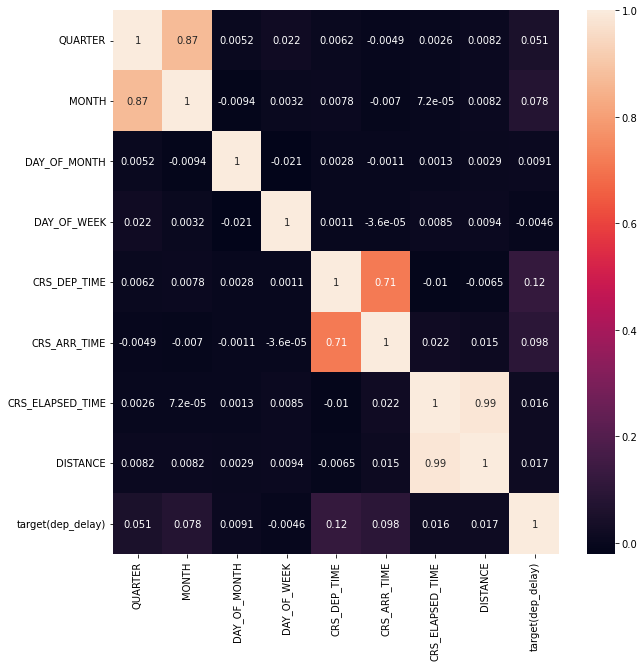

In [ ]:
corrMatrix = df_dep_delay.corr()
plt.figure(figsize=(10,10))
sn.heatmap(corrMatrix, annot=True)
plt.show()
# From the correlation plot, we can see that 
# The correlation between quarter and month is 0.87, 
# The correlation between planned departure time and planned arrival time is 0.71
# The correlation between planned elapsed time and distance is 0.99.
# So we decide to drop one of each from original dataset to exclude correlation between variables.

In [ ]:
df = df.drop(columns=['CRS_ARR_TIME','QUARTER','CRS_ELAPSED_TIME'])

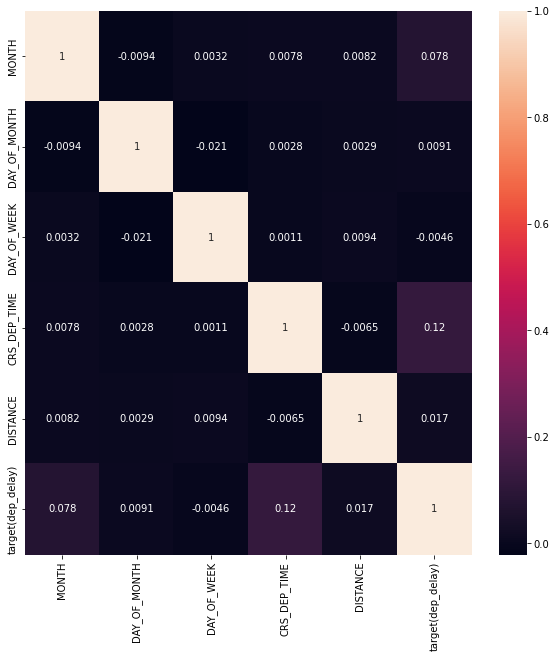

In [ ]:
# Draw the correlation matrix again.
df_dep_delay = df
df_dep_delay['target(dep_delay)'] = dep_delay
corrMatrix = df_dep_delay.corr()
plt.figure(figsize=(10,10))
sn.heatmap(corrMatrix, annot=True)
plt.show()
# Now the data is ready for prediction.

In [ ]:
# Exploratory Data Analysis

In [ ]:
df_full.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST,DEST_CITY_NAME,DEST_STATE_ABR,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,FLIGHTS,DISTANCE
0,2021,2,5,29,6,2021-05-29,OH,CLT,"Charlotte, NC",NC,BTV,"Burlington, VT",VT,2035,2050.0,15.0,1.0,2256,2255.0,-1.0,0.0,0.0,0.0,141.0,125.0,1.0,761.0
1,2021,2,5,30,7,2021-05-30,OH,CLT,"Charlotte, NC",NC,BTV,"Burlington, VT",VT,2035,2030.0,-5.0,0.0,2256,2236.0,-20.0,0.0,0.0,0.0,141.0,126.0,1.0,761.0
2,2021,2,5,31,1,2021-05-31,OH,CLT,"Charlotte, NC",NC,BTV,"Burlington, VT",VT,2035,2025.0,-10.0,0.0,2256,2252.0,-4.0,0.0,0.0,0.0,141.0,147.0,1.0,761.0
3,2021,2,5,6,4,2021-05-06,OH,DAY,"Dayton, OH",OH,DFW,"Dallas/Fort Worth, TX",TX,1616,1612.0,-4.0,0.0,1802,1808.0,6.0,0.0,0.0,0.0,166.0,176.0,1.0,861.0
4,2021,2,5,7,5,2021-05-07,OH,DAY,"Dayton, OH",OH,DFW,"Dallas/Fort Worth, TX",TX,1616,1626.0,10.0,0.0,1802,1805.0,3.0,0.0,0.0,0.0,166.0,159.0,1.0,861.0


In [ ]:
# Carrier Distribution
carrier_count = df_full.groupby("OP_UNIQUE_CARRIER").size()
carrier_count

OP_UNIQUE_CARRIER
9E     74374
AA    204423
AS     50340
B6     56060
DL    196999
F9     37997
G4     35618
HA     16774
MQ     69295
NK     52633
OH     62346
OO    200044
QX     32144
UA    110162
WN    289774
YV     43102
YX     92841
dtype: int64

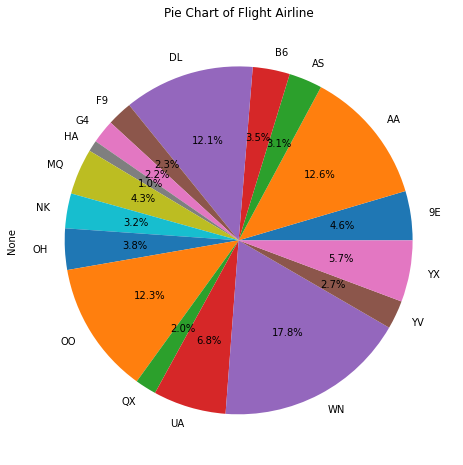

In [ ]:
plt.figure(figsize=(8,8))
carrier_count.plot.pie(autopct="%.1f%%")
plt.title("Pie Chart of Flight Airline")
plt.show()

In [ ]:
df_full.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST,DEST_CITY_NAME,DEST_STATE_ABR,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,FLIGHTS,DISTANCE
0,2021,2,5,29,6,2021-05-29,OH,CLT,"Charlotte, NC",NC,BTV,"Burlington, VT",VT,2035,2050.0,15.0,1.0,2256,2255.0,-1.0,0.0,0.0,0.0,141.0,125.0,1.0,761.0
1,2021,2,5,30,7,2021-05-30,OH,CLT,"Charlotte, NC",NC,BTV,"Burlington, VT",VT,2035,2030.0,-5.0,0.0,2256,2236.0,-20.0,0.0,0.0,0.0,141.0,126.0,1.0,761.0
2,2021,2,5,31,1,2021-05-31,OH,CLT,"Charlotte, NC",NC,BTV,"Burlington, VT",VT,2035,2025.0,-10.0,0.0,2256,2252.0,-4.0,0.0,0.0,0.0,141.0,147.0,1.0,761.0
3,2021,2,5,6,4,2021-05-06,OH,DAY,"Dayton, OH",OH,DFW,"Dallas/Fort Worth, TX",TX,1616,1612.0,-4.0,0.0,1802,1808.0,6.0,0.0,0.0,0.0,166.0,176.0,1.0,861.0
4,2021,2,5,7,5,2021-05-07,OH,DAY,"Dayton, OH",OH,DFW,"Dallas/Fort Worth, TX",TX,1616,1626.0,10.0,0.0,1802,1805.0,3.0,0.0,0.0,0.0,166.0,159.0,1.0,861.0


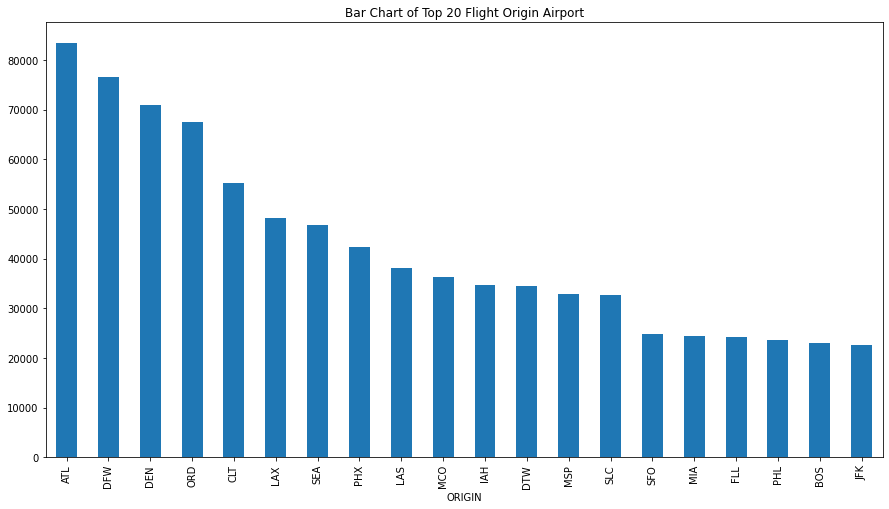

In [ ]:
# Origin Distribution
origin_airport = df_full.groupby("ORIGIN").size()
origin_airport = origin_airport.sort_values(ascending=False)[:20]
plt.figure(figsize=(15,8))
origin_airport.plot.bar()
plt.title("Bar Chart of Top 20 Flight Origin Airport")
plt.show()

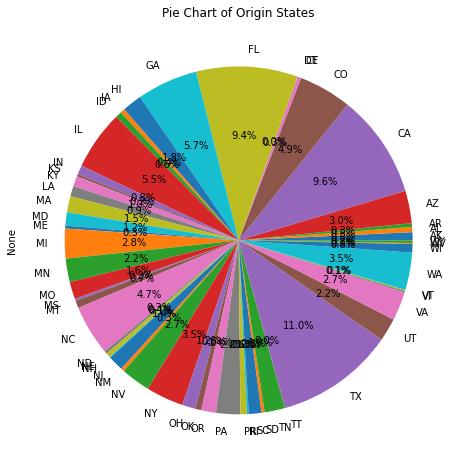

In [22]:
origin_state = df_full.groupby("ORIGIN_STATE_ABR").size()
plt.figure(figsize=(8,8))
origin_state.plot.pie(autopct="%.1f%%")
plt.title("Pie Chart of Origin States")
plt.show()

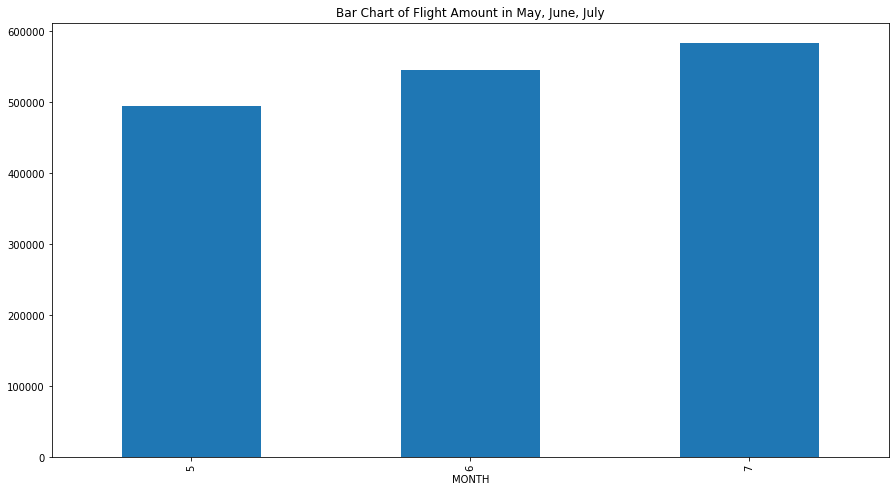

In [ ]:
month = df_full.groupby("MONTH").size()
month = month.sort_index()
plt.figure(figsize=(15,8))
month.plot.bar()
plt.title("Bar Chart of Flight Amount in May, June, July")
plt.show()

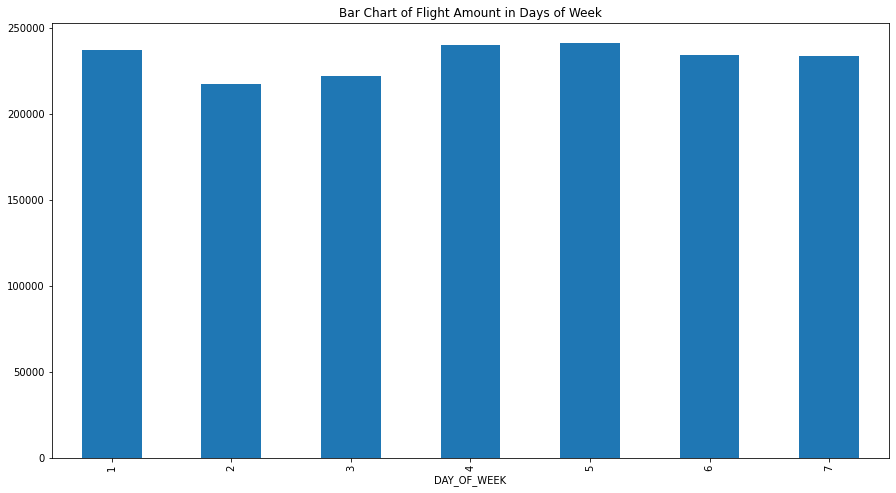

In [ ]:
day_of_week = df_full.groupby("DAY_OF_WEEK").size()
day_of_week = day_of_week.sort_index()
plt.figure(figsize=(15,8))
day_of_week.plot.bar()
plt.title("Bar Chart of Flight Amount in Days of Week")
plt.show()

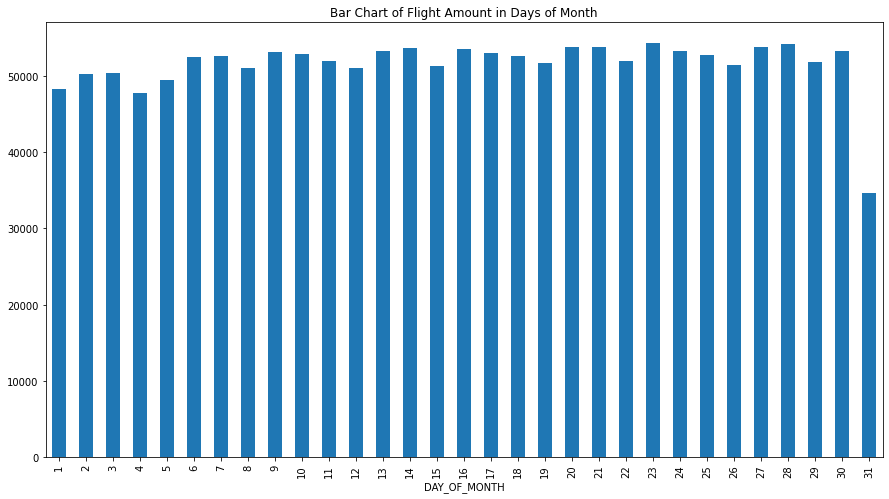

In [19]:
day_of_month = df_full.groupby("DAY_OF_MONTH").size()
day_of_month = day_of_month.sort_index()
plt.figure(figsize=(15,8))
day_of_month.plot.bar()
plt.title("Bar Chart of Flight Amount in Days of Month")
plt.show()

In [ ]:
## Build the model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(df_num, df_full['DEP_DEL15'], test_size=0.2, random_state=42)

In [ ]:
train_x.shape

(1299940, 861)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=29, n_estimators = 100)
model.fit(train_x, train_y)

In [ ]:
df_weekday = df_full.groupby("DAY_OF_WEEK")['DEP_DEL15'].sum()
df_weekday

DAY_OF_WEEK
1    53913.0
2    43849.0
3    41691.0
4    49491.0
5    53186.0
6    50410.0
7    50888.0
Name: DEP_DEL15, dtype: float64

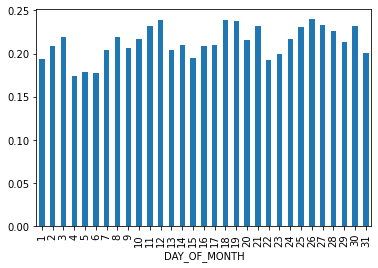

In [21]:
df_month = df_full.groupby("DAY_OF_MONTH")['DEP_DEL15'].mean()
df_month.plot.bar()

In [ ]:
avg_weekday_dep = df_full.groupby("DAY_OF_WEEK")['ARR_DEL15'].mean()
avg_weekday_dep

DAY_OF_WEEK
1    0.234233
2    0.203982
3    0.183872
4    0.209596
5    0.220094
6    0.206559
7    0.211377
Name: ARR_DEL15, dtype: float64

In [ ]:
type(df_weekday)

pandas.core.series.Series

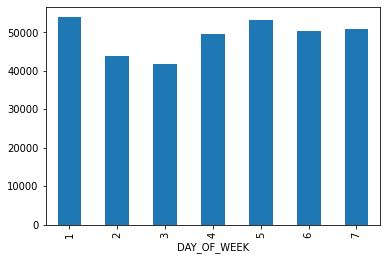

In [ ]:
df_weekday.plot.bar()


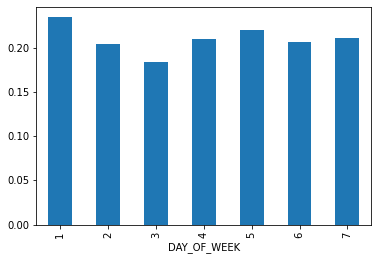

In [ ]:
avg_weekday_dep.plot.bar()

In [ ]:
sum_month = df_full.groupby("MONTH")['DEP_DEL15'].sum()
sum_month

MONTH
5     68004.0
6    129702.0
7    145722.0
Name: DEP_DEL15, dtype: float64

In [ ]:
avg_month = df_full.groupby("MONTH")['DEP_DEL15'].mean()
avg_month

MONTH
5    0.137836
6    0.241286
7    0.253685
Name: DEP_DEL15, dtype: float64

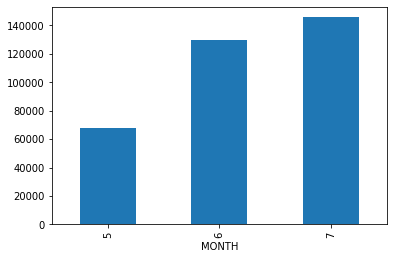

In [ ]:
sum_month.plot.bar()

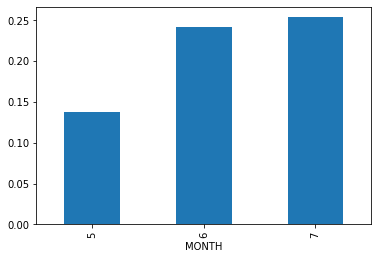

In [ ]:
avg_month.plot.bar()

In [ ]:
df['DataFrame Column'] = df['DataFrame Column'].apply(str)